## Consultar los trabajos de GetOnBoard con Python3

El siguiente programa utiliza los datos de trabajos de programación de la página GetOnBoard para mostrarlos en un DataFrame, filtrarlos y luego graficar los resultados filtrados.

## Preparativos
Primero, instalamos e importamos las bibliotecas necesarias: pandas para manejar los datos en un DataFrame, requests para realizar llamadas a la API, re para manipular texto y matplotlib para graficar.
```
! pip install pandas,requests,matplotlib

import pandas as pd
import requests
import re
import matplotlib.pyplot
```

Luego, definimos una función para limpiar los datos que contengan etiquetas HTML.


```
def remove_html_tags(text):
    clean_text = re.sub(r'<[^>]*>', ' ', str(text))
    return clean_text
```

Finalmente, definimos una función para filtrar trabajos por palabras clave.


```
def filter_jobs_by_keyword(df, keywords):
    filtered_df = pd.DataFrame()
    for keyword in keywords:
            filtered_df = pd.concat([filtered_df, df[df['desirable'].str.contains(keyword, case=False, na=False)]])
    return filtered_df

```

## Flujo de código

A continuación se mostrará el código del programa explicando brevemente lo que realiza.

## Llamada a la API y normalización de datos

Primero, realizamos una llamada a la API de GetOnBoard y normalizamos los datos con pandas.


```
response = requests.get('https://www.getonbrd.com/api/v0/categories/programming/jobs')
responseInJSON = response.json();
data = responseInJSON['data'];
df = pd.json_normalize(data);

```

Es importante mencionar que el metodo .json_normalize ya crea un dataframe normalizado.

## Limpieza de datos

Los datos de "functions" y "derisable" que entrega esta API están sucios con etiquetas HTML dentro del JSON, por lo tanto, para una mejor lectura es mejor limpiar esos datos. Aquí utilizamos la función antes definida para limpiar etiquetas HTML.

```
df['attributes.functions'] = df['attributes.functions'].apply(remove_html_tags);
df['attributes.desirable'] = df['attributes.desirable'].apply(remove_html_tags);
```
## Construir el Dataframe

Primero definiremos un arreglo con las columnas que necesitamos para el muestreo de datos, en este caso se eligen las siguientes.

```
columns_to_select = ['attributes.title', 'attributes.functions', 'attributes.desirable', 
                     'attributes.min_salary', 'attributes.max_salary', 'attributes.modality']
```
Luego, se verifica si es que la columna de "modality" es nula o no, debido a que varios trabajos que entrega la API no presentan este dato. Si se encuentra un dato nulo en modality, se elimina la columna. (puedes reemplazar este comportamiento por lo que tu quieras). Y finalmente se imprime el dataframe creado.

```
if 'attributes.modality' in df.columns:
    finalDf= df[columns_to_select]
    finalDf = df[[col for col in columns_to_select]]
    finalDf.columns=['title', 'functions', 'desirable', 'min_salary', 'max_salary']
else:
    columns_to_select.remove('attributes.modality')
    finalDf = df[[col for col in columns_to_select]]
    finalDf.columns=['title', 'functions', 'desirable', 'min_salary', 'max_salary']
    
finalDf
```
Con esto ya tenemos nuestro primer dataframe mostrando todos los trabajos con las columnas que quisimos mostrar.

## Filtrado por palabra

Primero, eliminaremos cualquier fila que tenga como "max_salary" NaN, ya que, en este caso nos interesa saber cuanto es el salario máximo que puede ganar un programador en base a las funciones que deba ejercer.

```
cleaned_df = finalDf.dropna(subset=['min_salary', 'max_salary'])

```

Luego, utilizamos la funcion filter_jobs_by_keyword() creada anteriormente para filtrar por palabras.

```
filtered_jobs = filter_jobs_by_keyword(cleaned_df,["Scrum","Microservicios","MongoDB"," .NET ", "Java"]);
filtered_jobs
```

## Gráfico

Para finalizar, utilizamos matplotlib.pyplot para graficar los datos filtrados.

El parámetro figsize especifica las dimensiones de la figura en pulgadas (ancho, alto). En este caso, (10, 6) indica que la figura tendrá 10 pulgadas de ancho y 6 pulgadas de alto.

```
plt.figure(figsize=(10, 6))
```

Luego, le indicamos al gráfico de barras quien será su eje x y quien será su eje Y. Se rota el label para los elementos del eje x en 45 grados para una mejor lectura y visibilidad, y finalmente se muestra el gráfico.

```
plt.bar(filtered_jobs['title'], filtered_jobs['max_salary'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.show()
```



In [1]:
%pip install pandas
%pip install requests
%pip install matplotlib

  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.

  Using cached charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.2.1-py3-none-any.whl.metadata (6.4 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl.metadata (2.2 kB)
   ---------------------------------------- 0.0/63.9 kB ? eta -:--:--
   ------ --------------------------------- 10.2/63.9 kB ? eta -:--:--
   -----

In [2]:
import sys
print(sys.executable)


C:\Users\bacun\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe


In [3]:
import pandas as pd
import re
import requests
import matplotlib.pyplot as plt



In [4]:
def remove_html_tags(text):
    clean_text = re.sub(r'<[^>]*>', ' ', str(text))
    return clean_text

In [6]:
response = requests.get('https://www.getonbrd.com/api/v0/categories/programming/jobs')
responseInJSON = response.json();
data = responseInJSON['data'];
df = pd.json_normalize(data);


In [7]:
df['attributes.functions'] = df['attributes.functions'].apply(remove_html_tags);
df['attributes.desirable'] = df['attributes.desirable'].apply(remove_html_tags);


In [8]:

columns_to_select = ['attributes.title', 'attributes.functions', 'attributes.desirable', 
                     'attributes.min_salary', 'attributes.max_salary', 'attributes.modality']

if 'attributes.modality' in df.columns:
    finalDf= df[columns_to_select]
    finalDf = df[[col for col in columns_to_select]]
    finalDf.columns=['title', 'functions', 'desirable', 'min_salary', 'max_salary']
else:
    columns_to_select.remove('attributes.modality')
    finalDf = df[[col for col in columns_to_select]]
    finalDf.columns=['title', 'functions', 'desirable', 'min_salary', 'max_salary']
    
finalDf

title  \
0                                       Programador   
1                                    Data Tech Lead   
2            Desarrollador/a Back-end (Spring Boot)   
3                     Desarrollador/a Ruby on Rails   
4                          Arquitecto Java Bilingüe   
..                                              ...   
95                               Front-end Engineer   
96  Gerente de Fábrica de Software Senior Inglés B1   
97                                     Web Engineer   
98                              Full-Stack Engineer   
99                        Junior Back-end Developer   

                                            functions  \
0    Estaras trabajando como desarrollador en proy...   
1    Estamos en busca de un profesional con experi...   
2     ¿Cuál será tu desafío en este cargo?   Crear...   
3     Analizar y programar las soluciones de Softw...   
4    Responsable del diseño, arquitectura y docume...   
..                                                ...   
95     Front End Development Excellence:  Harness ...   
96    Tendrás la oportunidad de:    Liderar la imp...   
97    Develop new features and maintain code for H...   
98   The ideal candidate will have robust experien...   
99    Experience with server-side development usin...   

                                            desirable  min_salary  max_salary  
0    Cloud services como Azure, AWS, GCP Bases de ...      2400.0      4000.0  
1     Back: Microservicios, API devolopment  Manej...         NaN         NaN  
2                                                             NaN         NaN  
3                                                             NaN         NaN  
4                                                             NaN         NaN  
..                                                ...         ...         ...  
95                                                         2000.0      2500.0  
96    Es un plus sí:    Especialización o maestría...      4000.0      4300.0  
97                                                            NaN         NaN  
98                                                         2000.0      3000.0  
99                                                         1500.0      2000.0  

[100 rows x 5 columns]

In [6]:
def filter_jobs_by_keyword(df, keywords, column):
    filtered_df = pd.DataFrame()
    for keyword in keywords:
            filtered_df = pd.concat([filtered_df, df[df[column].str.contains(keyword, case=False, na=False)]])
    return filtered_df

In [10]:
cleaned_df = finalDf.dropna(subset=['min_salary', 'max_salary'])
filtered_jobs = filter_jobs_by_keyword(cleaned_df,["Scrum","Microservicios","MongoDB"," .NET ", "Java"]);
filtered_jobs

title  \
8   Desarrollador Back-end Semi Senior   
8   Desarrollador Back-end Semi Senior   
6              Back-end .NET Developer   
8   Desarrollador Back-end Semi Senior   
31   Ingeniero de Software / Developer   

                                            functions  \
8    Estamos en busca de un Desarrollador Backend ...   
8    Estamos en busca de un Desarrollador Backend ...   
6     Design large scalable systems within a team ...   
8    Estamos en busca de un Desarrollador Backend ...   
31   En la VTI hay un equipo encargado de los Desa...   

                                            desirable  min_salary  max_salary  
8     Experiencia sólida en el desarrollo de aplic...      2500.0      3000.0  
8     Experiencia sólida en el desarrollo de aplic...      2500.0      3000.0  
6    - Fluent programming languages, .NET &amp; No...      3200.0      4350.0  
8     Experiencia sólida en el desarrollo de aplic...      2500.0      3000.0  
31   Estos conocimientos son parte de las cosas qu...      2500.0      3000.0

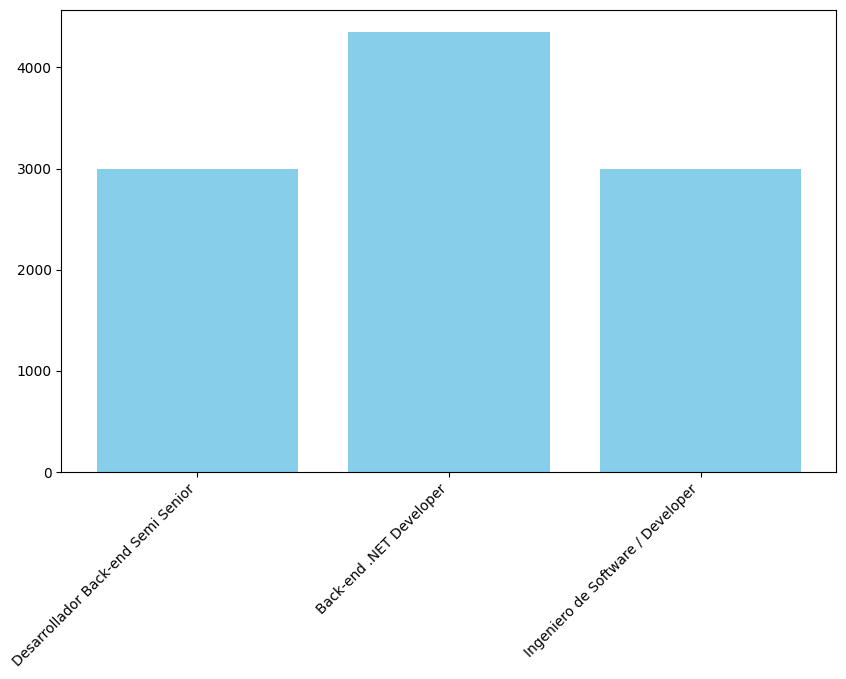

In [11]:
plt.figure(figsize=(10, 6))

plt.bar(filtered_jobs['title'], filtered_jobs['max_salary'], color='skyblue')

plt.xticks(rotation=45, ha='right') 

plt.show()


In [41]:
request = requests.get("https://www.getonbrd.com/api/v0/categories?per_page=100&page=1");
dataJson = request.json();
data = dataJson['data'];
categories = []
for element in data:
    categories.append(element['id']);
categories



['programming',
 'innovation-agile',
 'data-science-analytics',
 'customer-support',
 'sysadmin-devops-qa',
 'design-ux',
 'digital-marketing',
 'mobile-developer',
 'operations-management',
 'sales',
 'education-coaching',
 'other',
 'hr',
 'technical-support',
 'cybersecurity',
 'machine-learning-ai',
 'advertising-media',
 'hardware-electronics']

In [9]:
len(categories)

18

In [24]:
response2 = []
for cat in categories:
    request2 = (requests.get(f'https://www.getonbrd.com/api/v0/categories/{cat}/jobs?expand=["tags"]'))
    response2.append(request2.json()['data'])
response2

[[{'id': 'project-manager-sap-s-4hana-coderslab-io-remote',
   'type': 'job',
   'attributes': {'title': 'Project Manager SAP S/4HANA Bilingüe',
    'description_headline': 'Requerimientos del cargo',
    'description': '<p>Como Project Manager SAP será excluyente poseer conocimiento profundo de SAP S/4HANA y sus funcionalidades, comprender los procesos de negocio de la empresa y cómo SAP S/4HANA puede ayudar a mejorarlos y ser capaz de configurar y personalizar SAP S/4HANA para las necesidades específicas de la empresa.</p>',
    'projects': '<p>Importante de Retail masivo, se encuentra en expansión y mejoras en su equipo de Latam con el objetivo de llevar procesos mejorados y optimizados para llevar a más clientes del mercado del consumo masivo. </p><p>Actualmente nos encontramos en el crecimiento de los equipos apuntando a un crecimiento global que nos permita posicionarnos con nuestros productos en más paises de Latinoamérica, por lo que buscamos un Project Manager SAP con experien

In [25]:
ultimateDf = pd.DataFrame(response2)
ultimateDf

0   \
0   {'id': 'project-manager-sap-s-4hana-coderslab-...   
1   {'id': 'data-analyst-passport-shipping-remote-...   
2   {'id': 'customer-success-executive-bnamericas-...   
3   {'id': 'programador-biometria-aplicada-santiag...   
4   {'id': 'desarrollador-a-backend-javase-spring-...   
5   {'id': 'disenador-a-grafico-a-lfi-santiago', '...   
6   {'id': 'designer-community-manager-tcit-santia...   
7   {'id': 'android-engineer-haystack-news-lima-3a...   
8   {'id': 'operador-mandadito-bcp-lima', 'type': ...   
9   {'id': 'key-account-manager-kam-magnet-remote-...   
10  {'id': 'practicante-pre-profesional-campanas-c...   
11  {'id': 'tecnica-o-en-muestreo-asebiol-bogota',...   
12  {'id': 'tech-talent-acquisition-specialist-kib...   
13  {'id': 'salesforce-presales-bilingue-senior-re...   
14  {'id': 'cybersecurity-engineer-kibernum-santia...   
15  {'id': 'machine-learning-engineer-neuralworks-...   
16  {'id': 'cross-media-planner-forma-moovmedia-gr...   
17  {'id': 'coordinador-de-interfaces-cctv-scada-k...   

                                                   1   \
0   {'id': 'product-owner-rankmi-ciudad-de-mexico'...   
1   {'id': 'semi-senior-data-wrangler-23people-rem...   
2   {'id': 'colombia-customer-support-analyst-aleg...   
3   {'id': 'tech-lead-arkho-santiago-70da', 'type'...   
4   {'id': 'analista-qa-reemplazo-pre-y-post-natal...   
5   {'id': 'disenador-ux-ui-magnet-remote', 'type'...   
6   {'id': 'performance-manager-match-agencia-cons...   
7   {'id': 'software-engineer-flutter-humanforest-...   
8   {'id': 'project-management-office-coderslab-io...   
9   {'id': 'ejecutivo-a-de-cuentas-bsale-santiago-...   
10  {'id': 'instructor-full-stack-java-coding-dojo...   
11  {'id': 'analista-de-tesoreria-2brains-remote',...   
12  {'id': 'practicante-area-cultura-organizaciona...   
13  {'id': 'consultor-ti-tcit-santiago-b831', 'typ...   
14  {'id': 'arquitecto-de-ciberseguridad-en-aplica...   
15  {'id': 'ai-developer-fulltimeforce-remote', 't...   
16  {'id': 'content-writer-practica-profesional-tc...   
17  {'id': 'ingeniero-facilities-datacenter-climat...   

                                                   2   \
0   {'id': 'product-manager-2brains-santiago', 'ty...   
1   {'id': 'analista-de-datos-aws-power-bi-remoto-...   
2   {'id': 'customer-night-support-analyst-alegra-...   
3   {'id': 'desarrollador-a-backend-springboot-emp...   
4   {'id': 'arquitecto-cloud-orion-remote', 'type'...   
5   {'id': 'product-designer-encuadrado-santiago',...   
6   {'id': 'lider-marketing-latam-pre-y-post-natal...   
7   {'id': 'desarrollador-frontend-senior-en-flutt...   
8   {'id': 'jefe-de-proyectos-coderslab-io-ciudad-...   
9   {'id': 'business-representative-enviame-remote...   
10                                               None   
11  {'id': 'operador-de-campo-trend-group-america-...   
12  {'id': 'practica-profesional-talento-y-cultura...   
13  {'id': 'customer-service-bilingue-tutenlabs-re...   
14  {'id': 'disenador-de-ciberseguridad-en-aplicac...   
15  {'id': 'practica-en-area-de-sistemas-bice-vida...   
16  {'id': 'planner-estrategico-a-2brains-santiago...   
17  {'id': 'ingeniero-sistemas-conectividad-comuni...   

                                                   3   \
0   {'id': 'lider-de-portafolio-coderslab-io-remot...   
1   {'id': 'desarrollador-power-bi-data-lake-y-bd-...   
2   {'id': 'customer-success-consultant-driv-in-re...   
3   {'id': 'desarrollador-a-ruby-on-rails-empresas...   
4   {'id': 'operador-command-control-center-orion-...   
5   {'id': 'graphic-designer-grupo-navis-remote', ...   
6   {'id': 'head-of-growth-mov-e-grupo-kaufmann-sa...   
7   {'id': 'android-developer-global-mobility-apex...   
8   {'id': 'lider-de-proyecto-kibernum-concepcion'...   
9   {'id': 'sdr-inbound-lemontech-santiago-a54a', ...   
10                                               None   
11  {'id': 'it-architect-chile-orbis-data-remote',...   
12  {'id': 'lidera-excelencia-operacional-personas...   
1

In [26]:

ultimateDf.to_csv( 'trabajitos' , index=False);

In [27]:
jobs = []
for i in range(len(categories)):
    for j in range(len(response2[i])):
        jobs.append(response2[i][j])
jobs

[{'id': 'project-manager-sap-s-4hana-coderslab-io-remote',
  'type': 'job',
  'attributes': {'title': 'Project Manager SAP S/4HANA Bilingüe',
   'description_headline': 'Requerimientos del cargo',
   'description': '<p>Como Project Manager SAP será excluyente poseer conocimiento profundo de SAP S/4HANA y sus funcionalidades, comprender los procesos de negocio de la empresa y cómo SAP S/4HANA puede ayudar a mejorarlos y ser capaz de configurar y personalizar SAP S/4HANA para las necesidades específicas de la empresa.</p>',
   'projects': '<p>Importante de Retail masivo, se encuentra en expansión y mejoras en su equipo de Latam con el objetivo de llevar procesos mejorados y optimizados para llevar a más clientes del mercado del consumo masivo. </p><p>Actualmente nos encontramos en el crecimiento de los equipos apuntando a un crecimiento global que nos permita posicionarnos con nuestros productos en más paises de Latinoamérica, por lo que buscamos un Project Manager SAP con experiencia en

In [39]:
jobsDf = pd.json_normalize(jobs)
jobsDf = jobsDf.drop(['type','id','attributes.projects', 'attributes.description_headline', 'attributes.desirable', 'attributes.location_tenants.data', 'attributes.location_cities.data'], axis=1) # Drop innecesary columns, sacar headlines y campos sin información
jobsDf['attributes.functions'] = jobsDf['attributes.functions'].apply(remove_html_tags);
jobsDf['attributes.benefits'] = jobsDf['attributes.benefits'].apply(remove_html_tags);
jobsDf['attributes.description'] = jobsDf['attributes.description'].apply(remove_html_tags);
jobsDf

attributes.title  \
0             Project Manager SAP S/4HANA Bilingüe   
1                                    Product Owner   
2                   Product Manager Consumo Masivo   
3              Líder de Portafolio/Product Manager   
4                                     Scrum Master   
..                                             ...   
640                                      UX Writer   
641           Coordinador de Interfaces Cctv Scada   
642  Ingeniero Facilities Datacenter Climatización   
643   Ingeniero Sistemas Conectividad Comunicación   
644    Ingeniero Facilities Datacenter (Electrico)   

                                attributes.description  \
0     Como Project Manager SAP será excluyente pose...   
1      Profesionales de carreras como Ing. Civil In...   
2      Título en Ingeniería Comercial.  Experiencia...   
3      Profesional de la carrera de Ingeniería: civ...   
4      -Titulado de Ingeniería Civil Informática o ...   
..                                                 ...   
640    2-3 years of experience as a UX Writer.  Pre...   
641   Ingeniero/a electrónico, automatización o car...   
642   Como Ingeniero Facilities Datacenter perfil C...   
643   Experiencia proyectos tecnológicos integrales...   
644   Como Ingeniero Facilities Datacenter debes te...   

    attributes.functions_headline  \
0             Funciones del cargo   
1             Funciones del cargo   
2     El/la Product Manager debe:   
3             Funciones del cargo   
4             Funciones del cargo   
..                            ...   
640                      The role   
641           Funciones del cargo   
642           Funciones del cargo   
643           Funciones del cargo   
644           Funciones del cargo   

                                  attributes.functions  \
0     Como PM de SAP, estarás a cargo de la planifi...   
1      Reportar directo al Head of Product en el cu...   
2     Estamos en la búsqueda de un Product Manager ...   
3     1-Establecer la visión: Definir la visión est...   
4     Las principales funciones del cargo son:   Im...   
..                                                 ...   
640   Responsible for the long-term UX/UI content s...   
641    Funciones del cargo   Las principales respon...   
642   Como Ingeniero Facilities Datacenter perfil C...   
643    Responsable de liderar el proceso de Interfa...   
644   Como Ingeniero Facilities Datacenter (Eléctri...   

      attributes.benefits_headline  \
0                      Condiciones   
1              Nuestros Beneficios   
2                     Te ofrecemos   
3                      Condiciones   
4    Beneficios de ser ZervizLover   
..                             ...   
640                  What we offer   
641                    Condiciones   
642                    Condiciones   
643                    Condiciones   
644                    Condiciones   

                                   attributes.benefits  \
0     Trabajo 100% remoto, contrato indefinido, hor...   
1     🏄🏼‍♀️  Work-Life Balance    Blended Working: ...   
2      Trabajar con un equipo de alto rendimiento, ...   
3                                                        
4      ¡Seguro complementario de salud, vida y dent...   
..                                                 ...   
640    Make a positive impact on the lives of our c...   
641   Contratación estable y beneficios de la empresa    
642   Te mostramos algunos de nuestros beneficios: ...   
643   Fecha de Inicio: 01 de Abril. Quincena de Abr...   
644   Te mostramos algunos de nuestros beneficios: ...   

                         attributes.desirable_headline  attributes.remote  \
0                                           Opcionales               True   
1          Cualidades que los Rockers tenemos en común              False   
2    ¿Qué competencias buscamos en/la Product Manager?              False   
3                                           Opcionales              False   
4      

In [40]:
print(jobsDf['attributes.tags.data'])

0      [{'id': 'sap', 'type': 'tag', 'attributes': {'...
1      [{'id': 'agile', 'type': 'tag', 'attributes': ...
2      [{'id': 'product-manager', 'type': 'tag', 'att...
3      [{'id': 'product-manager', 'type': 'tag', 'att...
4      [{'id': 'agile', 'type': 'tag', 'attributes': ...
                             ...                        
640    [{'id': 'ux', 'type': 'tag', 'attributes': {'n...
641    [{'id': 'advertising', 'type': 'tag', 'attribu...
642                                                   []
643    [{'id': 'advertising', 'type': 'tag', 'attribu...
644                                                   []
Name: attributes.tags.data, Length: 645, dtype: object


# Información General
1. ¿Cuántas categorías de trabajos hay en el dataset?

In [30]:
print("Existen",len(categories), "categorias de trabajos en el dataset")

Existen 18 categorias de trabajos en el dataset


2.¿Cuántos trabajos hay en total en el dataset?

In [31]:
print("Hay un total de", jobsDf['attributes.title'].size, "trabajos en el dataset" )

Hay un total de 645 trabajos en el dataset


3.¿Cuál es la categoría con más ofertas de trabajo?

In [32]:
#.sort_values(ascending=False) ordena los valores de esta columna en orden descendente (de mayor a menor).
# .index devuelve los índices de los valores ordenados
aplicationsSort = jobsDf['attributes.applications_count'].sort_values(ascending=False).index
print("El trabajo con más aplicaciones es", jobsDf['attributes.title'][aplicationsSort[0]], "con", jobsDf['attributes.applications_count'][aplicationsSort[0]], "aplicaciones")

El trabajo con más aplicaciones es Analista de Datos con 3782 aplicaciones


4.¿Cuál es la categoría con menos ofertas de trabajo?

In [33]:
#.sort_values(ascending=True) ordena los valores de esta columna en orden ascendente (de menor a mayor)., en este caso se revisó
#que el trabajo con menos aplicaciones es 0 por lo que se buscaron todos los trabajos con este numero de aplicaciones en vez de utilizar .sort_values(ascending=True)
# .index devuelve los índices de los valores ordenados
jobsWithouAplications = jobsDf[jobsDf['attributes.applications_count'] == 0] # Se filtran los trabajos con 0 aplicaciones :D
print("Hay", jobsWithouAplications['attributes.title'].size, "trabajos sin aplicaciones")
print("La lista de trabajos sin aplicaciones es:"," \n " ,jobsWithouAplications['attributes.title'].values,"\n"
      "con un total de", jobsWithouAplications['attributes.applications_count'].values[0], "aplicaciones cada uno")

Hay 7 trabajos sin aplicaciones
La lista de trabajos sin aplicaciones es:  
  ['Consultor SAP Fico Inglés Avanzado' 'QA Specialist'
 'Desarrollador Back-end Aplicaciones Móviles' 'Office Manager'
 'Arquitecto de Ciberseguridad en Aplicacionesaws/Onpremise'
 'Diseñador de Ciberseguridad en Aplicaciones' 'Iso 27001 Consultant'] 
con un total de 0 aplicaciones cada uno


# Detalles por Trabajo
5. ¿Cuáles son los títulos de todos los trabajos en la categoría de 'Programming'?

In [34]:
# Se filtran los trabajos que contienen las palabras 'Programador', 'Desarrollador' o 'Developer' en su título, 
#case=False para que no sea sensible a mayúsculas y minúsculas, na=False para que no tome en cuenta los valores nulos
programingTitles = jobsDf[jobsDf['attributes.title'].str.contains("Programador|Desarrollador|Developer|Programming", case=False, na=False)] 
print("Hay", programingTitles['attributes.title'].size, "trabajos que contienen las palabras 'Programador', 'Desarrollador', 'Developer' o 'Programming' en su título")

Hay 91 trabajos que contienen las palabras 'Programador', 'Desarrollador', 'Developer' o 'Programming' en su título


6.¿Qué porcentaje de trabajos requieren experiencia en 'Remote' o 'Hybrid' en comparación con los trabajos presenciales?

In [35]:
remoteJobs = jobsDf[jobsDf['attributes.remote'] == True] # Se filtran los trabajos que son remotos
print("Hay", remoteJobs['attributes.title'].size, "trabajos remotos")
hybridJobs = jobsDf[jobsDf['attributes.remote_modality'] == 'hybrid'] # Se filtran los trabajos que son híbridos
print("Hay", hybridJobs['attributes.title'].size, "trabajos híbridos")
presentialJobs = jobsDf[(jobsDf['attributes.remote'] == False) & (jobsDf['attributes.remote_modality'] != 'hybrid')] # Se filtran los trabajos que son presenciales
print("Hay", presentialJobs['attributes.title'].size, "trabajos presenciales")

totalRemoteHybridJobs = remoteJobs['attributes.title'].size + hybridJobs['attributes.title'].size
presentialJobs = presentialJobs['attributes.title'].size

print("Hay", totalRemoteHybridJobs, "trabajos que requieren experiencia en remoto o híbrido")
if presentialJobs > 0:  # Evitar división por cero pofavo
    porcentajeRH = (totalRemoteHybridJobs/(presentialJobs+totalRemoteHybridJobs)) * 100;
    porcentajeP = (presentialJobs/(presentialJobs+totalRemoteHybridJobs))*100;
    print("El porcentaje de trabajos que requieren experiencia en remoto o híbrido es ", porcentajeRH,"%");
    print("El porcentaje de trabajos que requieren experiencia en presencial es ", porcentajeP,"%");
else:
    print("No hay trabajos presenciales para comparar.")

Hay 239 trabajos remotos
Hay 349 trabajos híbridos
Hay 57 trabajos presenciales
Hay 588 trabajos que requieren experiencia en remoto o híbrido
El porcentaje de trabajos que requieren experiencia en remoto o híbrido es  91.16279069767442 %
El porcentaje de trabajos que requieren experiencia en presencial es  8.837209302325581 %


7.¿Cuáles son las tres habilidades más comúnmente solicitadas en la categoría de 'Data Science / Analytics'?

In [50]:
dfDataScienceAnalytics = filter_jobs_by_keyword(jobsDf,['Data Science / Analytics'],'attributes.category_name')
dfDataScienceAnalytics


attributes.title  \
50                                   Data Analyst   
51                      Semi Senior Data Wrangler   
52                 Analista de Datos AWS Power BI   
53                         Desarrollador Power BI   
54                                 Data Scientist   
55                            Senior Data Analyst   
56           Semi Senior/Senior DBA/Data Engineer   
57   Data Scientist (Reemplazo Licencia Maternal)   
58                         Marketing Data Analyst   
59                      Data Operations Associate   
60                                   Data Analyst   
61                                   Data Analyst   
62                     Data Governance Specialist   
63                             Tech Data Engineer   
64      Arquitecto de Datos Senior Híbrido Bogotá   
65                                  Data Engineer   
66                                 Data Scientist   
67               Coordinador de Gobierno de Datos   
68                                   Data Analyst   
69                      Operador de Base de Datos   
70                     Ingeniero/a BI y Proyectos   
71                                   Data Analyst   
72                               Data Engineer 🚀🌟   
73                      Data Visualization Expert   
74                                 Data Scientist   
75                                  Data Engineer   
76                            Arquitecto de Datos   
77                    Analista Desarrollador Data   
78           Analista Gobierno de Datos (Híbrido)   
79                       Data Scientist Analytics   
80                       Big Data Analytics NoSQL   
81                               Business Analyst   
82                              Analista de Datos   
83                           Analista de Estudios   
84                         Consultor Data Science   
85                            Analista de Control   
86                                  Data Engineer   
87                            Data Analyst Junior   
88                          Specialist Consultant   
89                                Python Engineer   
90                           Data Analyst Junior🚀   
91                            Analista Financiero   
92            Analista de Cuentas Médicas /Bogotá   
93                          Consultor ETL (Chile)   
94                                  Data Engineer   
95                                 Data Scientist   
96            Analista Gestión Tecnología y Datos   
97                             Ingeniero de Datos   
98                      Analista de Base de Datos   
99                       Analista de Datos Junior   
100                           Consultor/a de Data   
101                      Ingeniero Analítica y BI   
102                           Ingeniero Jr. | ETL   
103                             Analista de Datos   
104                                  Data Analyst   
105          Analista Inteligencia Negocio Riesgo   
106                      Ingeniero Analítica y BI   
107                        Ingeniero Data Science   
108  Ingeniero Power BI/SQL – Contrato Proyecto 6   

                                attributes.description  \
50     Professional level English Speaking/ Writing...   
51    Skills 🧑‍💻👩‍💻   (habilidades técnicas)   • Us...   
52     ¿Qué requerimos?    Técnico, tecnólogo o pro...   
53    Para el cargo a postular contamos con los sig...   
54     Título de Ingeniero en Computación, T.I., li...   
55    § Leverage analytics data to extract insights...   
56      3+ years of relevant experience  Strong exp...   
57     Ingeniería Civil Industrial, Ingeniería Civi...   
58     5+ years of experience using analytics platf...   
59     C1 or above English level (strictly necessar...   
60     Más de 4 años de experiencia como Analista d...   
61     Mínimo de 3 años de experiencia en un rol de...   
62    Conocimientos Técnicos:  Tecnología cloud (AW...   
63    🤓Es esencial: (habilidades mandato

In [52]:
from collections import Counter;
tag_counter = Counter()

# Iterar sobre cada fila del dataframe
for _, row in dfDataScienceAnalytics.iterrows():
    tags = row["attributes.tags.data"]
    for tag in tags:
        tag_id = tag['id']
        tag_counter[tag_id] += 1

# Obtener los 3 tags más frecuentes
most_common_tags = tag_counter.most_common(3)

# Mostrar los resultados
print(most_common_tags)

[('sql', 40), ('back-end', 33), ('python', 32)]


In [63]:
dfCert = filter_jobs_by_keyword(jobsDf,['certifi'],'attributes.description');
dfCert

KeyError: 'attributes.desirable'

In [61]:
dfCert.shape

(46, 29)

## 46 registros que solicitan certificaciones

## Pregunta 4

In [77]:
tag_counter = 0

# Iterar sobre cada fila del dataframe
for _, row in jobsDf.iterrows():
    tags = row["attributes.tags.data"]
    for tag in tags:
        tag_id = tag['id']
        if (tag_id == "english"):
            tag_counter += 1;

print((tag_counter/jobsDf.shape[0])*100, "%")

21.86046511627907 %
